# Maquinas de vectores de soporte.
En esta clase vamos a usar un clasificador de vectores de soporte para reconocer digitos en un conjunto de imagenes. A diferencia de los ejemplos anteriores, en que teniamos solo dos clases ( 0 , 1 ) en este caso tenemos 10 clases (0, 1,..., 9).

El dataset forma parte de los ejemplos de sklearn, por lo que lo podemos cargar directamente.

In [ ]:
# importo lo de siempre aunque no lo necesite...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# importo el dataset y cargo los datos
from sklearn import datasets
dataset_digitos = datasets.load_digits()

Quiero que hagamos un poco de sentido de que viene en el dataset.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


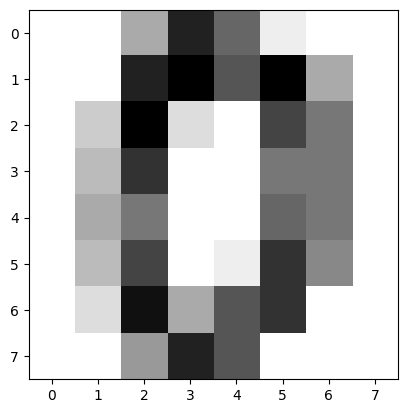

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
1


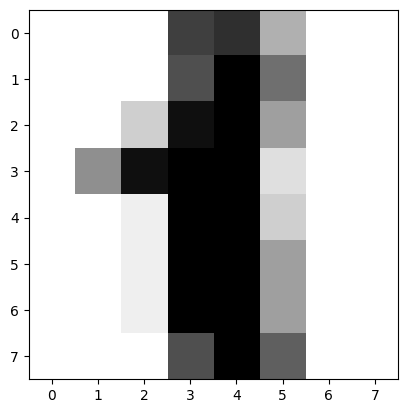

[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
2


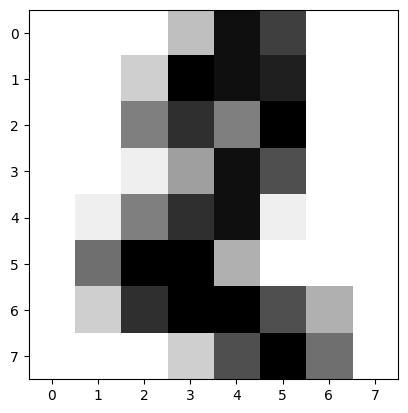

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
3


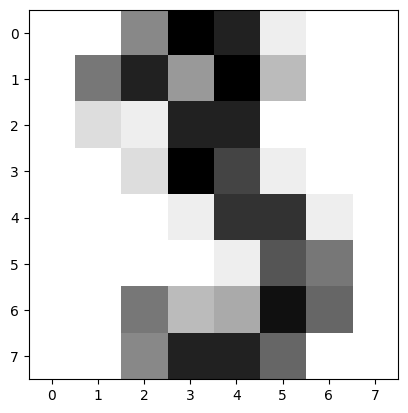

[ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
  1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
  0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1.  0.  0.  0.  0.  3. 15. 10.
  0.  0.  0.  0.  0.  2. 16.  4.  0.  0.]
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]
4


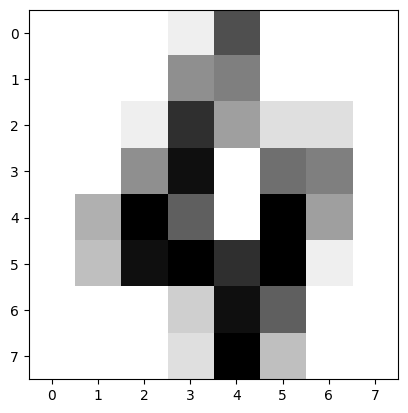

[ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]
[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]
5


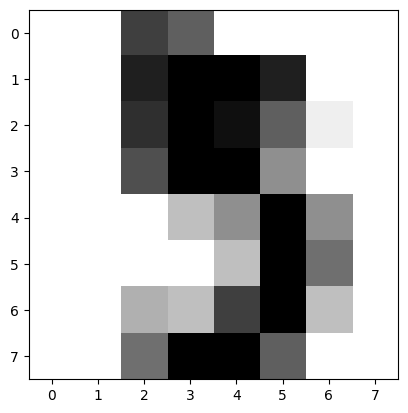

[ 0.  0.  0. 12. 13.  0.  0.  0.  0.  0.  5. 16.  8.  0.  0.  0.  0.  0.
 13. 16.  3.  0.  0.  0.  0.  0. 14. 13.  0.  0.  0.  0.  0.  0. 15. 12.
  7.  2.  0.  0.  0.  0. 13. 16. 13. 16.  3.  0.  0.  0.  7. 16. 11. 15.
  8.  0.  0.  0.  1.  9. 15. 11.  3.  0.]
[[ 0.  0.  0. 12. 13.  0.  0.  0.]
 [ 0.  0.  5. 16.  8.  0.  0.  0.]
 [ 0.  0. 13. 16.  3.  0.  0.  0.]
 [ 0.  0. 14. 13.  0.  0.  0.  0.]
 [ 0.  0. 15. 12.  7.  2.  0.  0.]
 [ 0.  0. 13. 16. 13. 16.  3.  0.]
 [ 0.  0.  7. 16. 11. 15.  8.  0.]
 [ 0.  0.  1.  9. 15. 11.  3.  0.]]
6


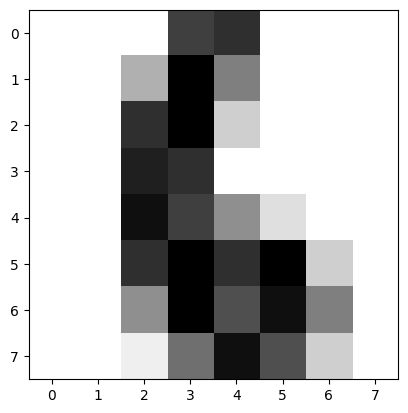

[ 0.  0.  7.  8. 13. 16. 15.  1.  0.  0.  7.  7.  4. 11. 12.  0.  0.  0.
  0.  0.  8. 13.  1.  0.  0.  4.  8.  8. 15. 15.  6.  0.  0.  2. 11. 15.
 15.  4.  0.  0.  0.  0.  0. 16.  5.  0.  0.  0.  0.  0.  9. 15.  1.  0.
  0.  0.  0.  0. 13.  5.  0.  0.  0.  0.]
[[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]
7


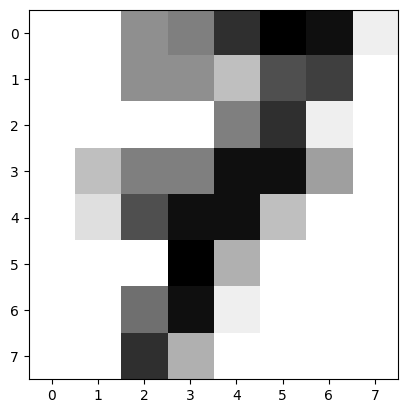

[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
  9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
 16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
  8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]
8


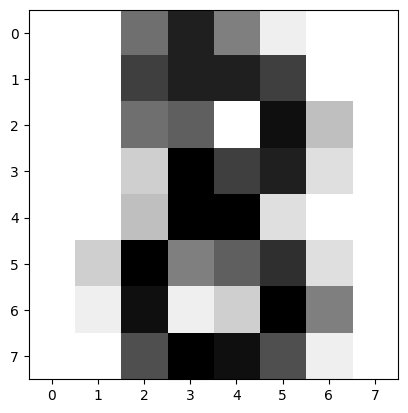

[ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
 16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
  9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
  4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]
9


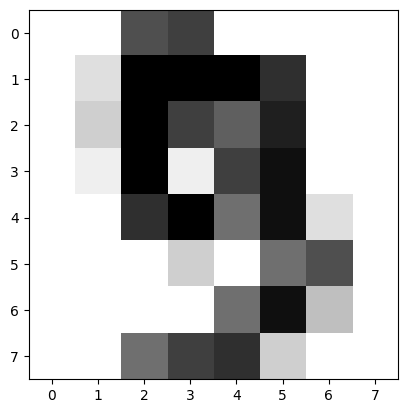

In [ ]:
for i in range(0,10) :
  # Cada dato contiene un arreglo de dim 64
  print(dataset_digitos.data[i])
  # Pero puedo ver ese arreglo como imagen de 8x8
  print(dataset_digitos.images[i])
  # Viene una etiqueta indicando cual es el digito
  print(dataset_digitos.target[i])
  # y puedo ver la imagen..
  plt.imshow(dataset_digitos.images[i], cmap = plt.cm.gray_r ,
             interpolation='nearest')
  plt.show()






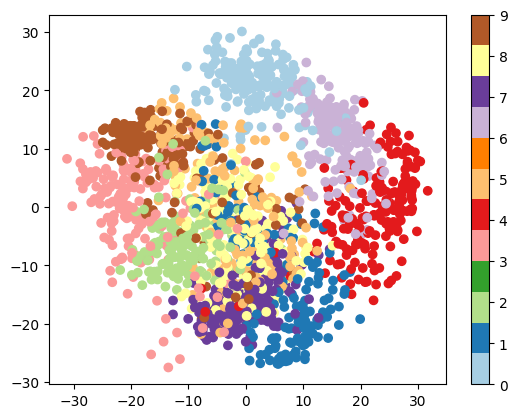

In [ ]:
# Se trata de un problema en 64 dimensiones, que no
# logro ni imaginarmelo.
# Pero si puedo hacer un grafico proyectado a 2 dimensiones.
from sklearn.decomposition import PCA
plt.figure()
pca = PCA(n_components=2)
proyeccion = pca.fit_transform(dataset_digitos.data)
plt.scatter(proyeccion[:, 0],proyeccion[:, 1],
            c=dataset_digitos.target, cmap= 'Paired')
plt.colorbar()
plt.show()

In [ ]:
# vamos con el modelo...
# Esta parte es similar a la que hemos hecho antes
# con otros clasificadores.
from sklearn.model_selection import train_test_split
from sklearn.svm  import SVC

X = dataset_digitos.data
y = dataset_digitos.target
(X_train, X_test, y_train, y_test ) = \
  train_test_split(X, y, test_size=0.2, random_state=42)
modelo = SVC(gamma= 0.001, C = 100)
modelo.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

La etiqueta era :  6
La predicción fue:  6


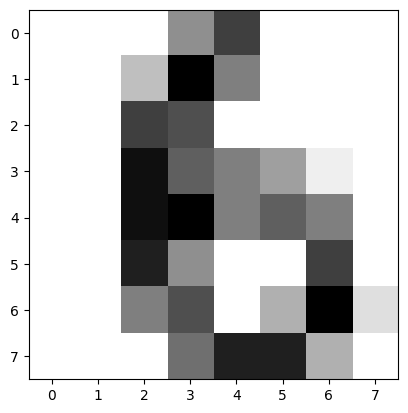

In [ ]:
# Hagamos la prediccion
y_prediccion = modelo.predict(X_test)
# Pero antes del hacer la matriz y el reporte, veamos
# un caso a mano...
print('La etiqueta era : ', y_test[0])
print('La predicción fue: ', y_prediccion[0])
plt.imshow(X_test[0].reshape(8,8), cmap = plt.cm.gray_r ,
             interpolation='nearest')
plt.show()

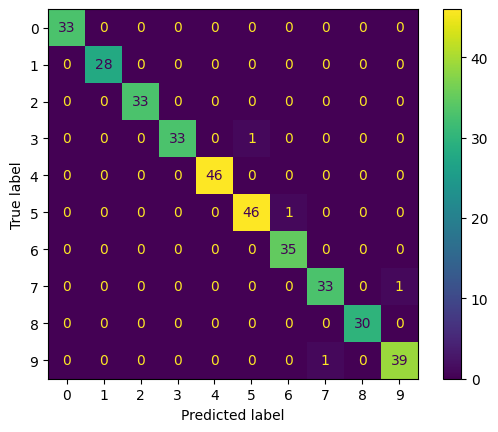

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
# hagamos la verificacion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
matriz = confusion_matrix(y_true = y_test, y_pred = y_prediccion)
display = ConfusionMatrixDisplay(matriz)
display.plot()
plt.show()
reporte = classification_report(y_true = y_test, y_pred = y_prediccion)
print(reporte)

In [ ]:
# Ejercicio: realizar la misma operacion usando naive bayes